In [6]:
from pymatgen.ext.matproj import MPRester
import crystal_toolkit

In [23]:
mpr = MPRester("GVPDJzGk7QCVi80Gnm6QCYrKAlJiTtLf")
mp_id = "mp-4019"
cto_structure = mpr.get_structure_by_material_id(mp_id)
# print(cto_structure)
cto_structure.add_oxidation_state_by_element({"Ca":2, "Ti":4, "O":-2})

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
from pymatgen.core.surface import SlabGenerator

In [25]:
slabgen = SlabGenerator(cto_structure, (0,0,1), 10, 10)

In [26]:
slabs = slabgen.get_slabs()

In [12]:
print(len(slabs))

2


In [14]:
print(slabs[0])

Slab Summary (Ca8 Ti8 O24)
Reduced Formula: CaTiO3
Miller index: (0, 0, 1)
Shift: 0.0201, Scale Factor: [[1 0 0]
 [0 1 0]
 [0 0 1]]
abc   :   5.372049   5.462796  30.545438
angles:  90.000000  90.000000  90.000000
Sites (40)
1 Ca     0.509067     0.542398     0.182480
2 Ca     0.490933     0.457602     0.057480
3 Ca     0.990933     0.042398     0.182480
4 Ca     0.009067     0.957602     0.057480
5 Ti     0.000000     0.500000     0.119980
6 Ti     0.000000     0.500000     0.244980
7 Ti     0.500000     0.000000     0.119980
8 Ti     0.500000     0.000000     0.244980
9 O     0.076781     0.481328     0.182480
10 O     0.923219     0.518672     0.057480
11 O     0.423219     0.981328     0.182480
12 O     0.576781     0.018672     0.057480
13 O     0.790294     0.789614     0.234940
14 O     0.209706     0.210386     0.109940
15 O     0.209706     0.210386     0.005020
16 O     0.790294     0.789614     0.130020
17 O     0.709706     0.289614     0.234940
18 O     0.290294     0.7103

In [27]:
slabs[0].matches(slabs[1])

False

In [16]:
from pymatgen.analysis.adsorption import plot_slab
from matplotlib import pyplot as plt
%matplotlib inline

# Makes the plot inline with the code

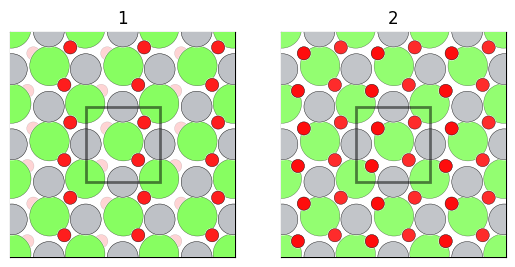

In [17]:
fig = plt.figure()
for i, slab in enumerate(slabs):
    ax = fig.add_subplot(1, 2, i+1)
    plot_slab(slab, ax, adsorption_sites=False)
    ax.set_title(i+1)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [18]:
slabs[0].to(fmt="cif", filename="cto_001_1.cif")
slabs[1].to(fmt="cif", filename="cto_001_2.cif")

"# generated using pymatgen\ndata_CaTiO3\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   5.37204886\n_cell_length_b   5.46279649\n_cell_length_c   30.54543848\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   CaTiO3\n_chemical_formula_sum   'Ca8 Ti8 O24'\n_cell_volume   896.39895077\n_cell_formula_units_Z   8\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Ca  Ca0  1  0.50906691  0.54239755  0.15123016  1\n  Ca  Ca1  1  0.49093309  0.45760245  0.02623016  1\n  Ca  Ca2  1  0.99093309  0.04239755  0.15123016  1\n  Ca  Ca3  1  0.00906691  0.95760245  0.02623016  1\n  Ti  Ti4  1  0.00000000  0.50000000  0.08873016  1\n  Ti  Ti5  1  0.00000000  0.50000000  0.213730

In [29]:
for n, slab in enumerate(slabs):
    print(n, slab.is_polar(), slab.is_symmetric())

0 True False
1 False False


In [30]:
from pymatgen.core.surface import generate_all_slabs

In [31]:
all_slabs = generate_all_slabs(cto_structure, 2, 10, 10)

In [32]:
valid_slabs = []
for slab in all_slabs:
    if not slab.is_polar() and slab.is_symmetric():
        valid_slabs.append(slab)

print(len(all_slabs), len(valid_slabs))

77 5


In [1]:
slab[0]

NameError: name 'slab' is not defined